Student Performance Indicator

Life cycle of ml project

1 - understanding the problem statement
2 - Data Collection
3 - data Checks to perform
4 - Exploratory Data Analysis
5 - Data pre-processing
6 - Model Training
7 - Choose best model


1 - problem statement
    this project understand how the student performace(test scores) is affected by oyher variables such as Gender , Ethnicity , Parental Level Of Education , Lunch and Test Preparation course.

2 - data Collection - from kaggle student performance
    this data consists of 8 cols and 1000 rows

import pandas,numpy,matplotlib,seaborn and warnings

In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

c:\Users\harsh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
dataset = pd.read_csv("./data/stud.csv")

In [5]:
dataset.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
dataset.shape

(1000, 8)

Dataset  Information

1 -   Gender: sex of students - (male/female)
2 -   race/ethnnicity : ethnicity of students- (Group A,B,C,D,E)
3 -   parental level of education - parents final education - (bachelor's   degree, some college, master's degree, associate's degree , high school)
4 -   lunch - having lunch before test (free/reduced , standard)
5 -   test_preparation_course : complete or not complete before test
6 -   math score
7 -   reading score
8 -   writing score

3 - Data Checks to perform

1 - check missing values
2 - check duplicates
3 - check data types
4 - check the number of unique values of each column
5 - check the statistic of the dataset
6 - check values categories present in the diff categorical column 

In [10]:
dataset.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [13]:
dataset.duplicated().sum()

0

In [17]:
dataset.info() # check null and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [19]:
dataset.nunique() # check no of unique values of each column

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [20]:
# check statistic of the dataset
dataset.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


insight

1 - from above description of numerical data , all means are very close to each other - b/w 66 and 68.05
2 - all S.D. are also close - b/w 14.6 and 15.19
3 - while there is a minimum score 0 for math , for writing minimum is much higher = 10 and for reading min = 17

In [25]:
dataset.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [26]:
# exploring data
print("Categories in 'Gender' variable: ",end=" ")
print(dataset['gender'].unique())

print("Categories in 'race_ethnicity' variable: ",end=" ")
print(dataset['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ",end=" ")
print(dataset['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ",end=" ")
print(dataset['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ",end=" ")
print(dataset['test_preparation_course'].unique())

Categories in 'Gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [29]:
# define numerical and categorical cols
numeric_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [31]:
# adding cols for total score and average 
dataset["total_score"] = dataset["math_score"] + dataset["reading_score"] + dataset["writing_score"]
dataset["average"] = dataset["total_score"]/3
dataset.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [32]:
reading_full_marks = dataset[dataset["reading_score"] == 100]["average"].count()
writing_full_marks = dataset[dataset["writing_score"] == 100]["average"].count()
math_full_marks = dataset[dataset["math_score"] == 100]["average"].count()

print(f'Number of students with full marks in Maths: {math_full_marks}')
print(f'Number of students with full marks in Writing: {writing_full_marks}')
print(f'Number of students with full marks in Reading: {reading_full_marks}')


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [33]:
reading_less_20 = dataset[dataset["reading_score"] <= 20]["average"].count()
writing_less_20 = dataset[dataset["writing_score"] <= 20]["average"].count()
math_less_20 = dataset[dataset["math_score"] <= 20]["average"].count()

print(f'Number of students with less than marks in Maths: {math_less_20}')
print(f'Number of students with less than marks in Writing: {writing_less_20}')
print(f'Number of students with less than marks in Reading: {reading_less_20}')
  

Number of students with less than marks in Maths: 4
Number of students with less than marks in Writing: 3
Number of students with less than marks in Reading: 1


insights
from above values we get students have perormed the worst inn maths and best in reading section 

4. Exporing Data(Visualization)

historam
kernel distributoin function(kde)


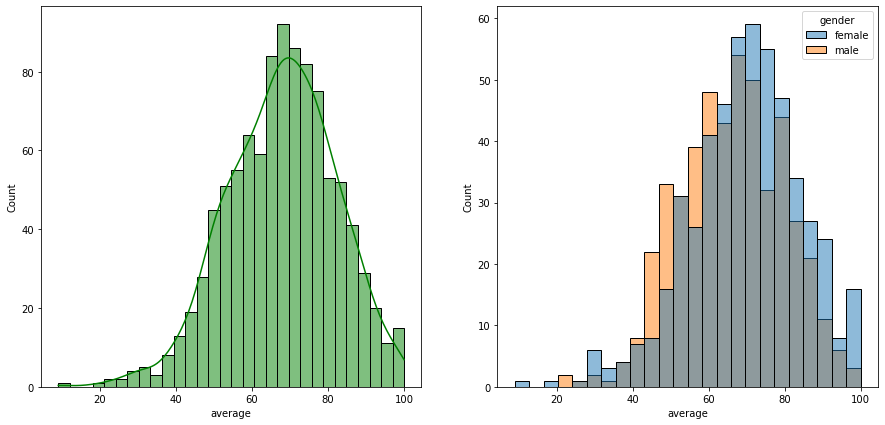

In [35]:
fig , axis = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=dataset,x="average",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=dataset,x="average",hue="gender")
plt.show()

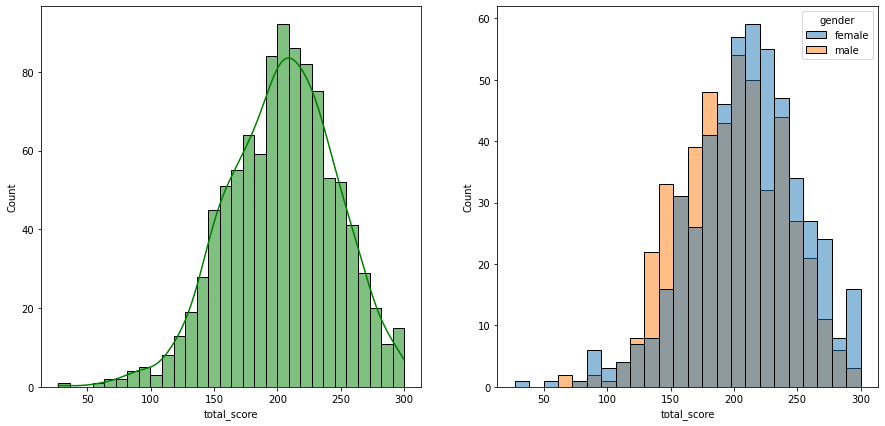

In [36]:
fig , axis = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=dataset,x="total_score",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=dataset,x="total_score",hue="gender")
plt.show()

insights
femala students perform well than male students


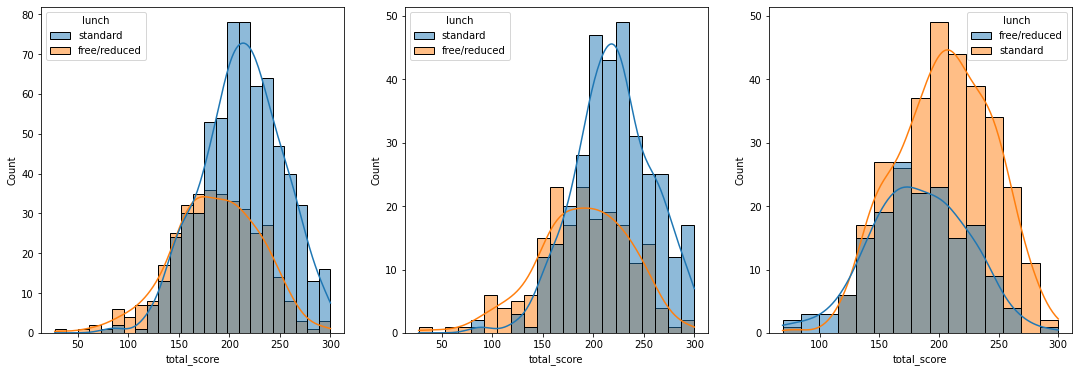

In [37]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=dataset,x="total_score",kde=True,hue="lunch")
plt.subplot(142)
sns.histplot(data=dataset[dataset.gender == "female"],x="total_score",kde=True,hue="lunch")
plt.subplot(143)
sns.histplot(data=dataset[dataset.gender == "male"],x="total_score",kde=True,hue="lunch")
plt.show()